# Build Logistic Regression Model from 1st Principles

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

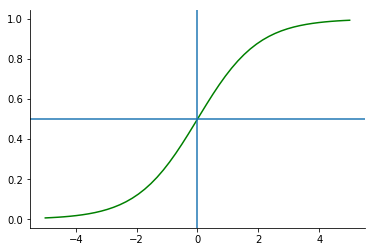

In [28]:
# plot sigmoidal function
def sigmoidal(x):
    return 1 / (1 + math.e ** -x )
    
x_values= np.linspace(-5,5)
y_values= sigmoidal(x_values)

plt.plot(x_values, y_values, "g-")
plt.axhline(.5)
plt.axvline(0)
sb.despine()
plt.show()

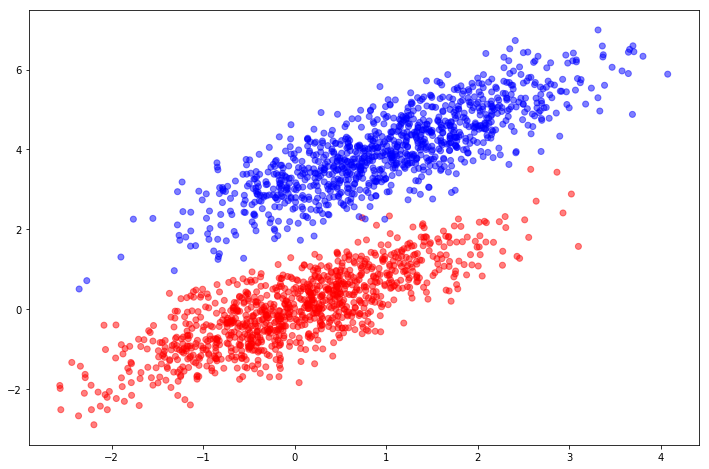

In [80]:
# generate some linearly-separable points
np.random.seed(10)
n = 1000

x1 = np.random.multivariate_normal([0,0], [[1,.80],[.80,1]], n)
x2 = np.random.multivariate_normal([1,4], [[1,.80],[.80,1]], n)

consolidated_feature = np.vstack((x1, x2)).astype(np.float32)
# print array shape
print np.shape(consolidated_feature)

labels = np.hstack((np.zeros(n), np.ones(n))).astype(np.int)

plt.figure(figsize=(12,8))
col = {0:'r',1:'b'}

plt.scatter(consolidated_feature[:,0], consolidated_feature[:,1], c=[col[x] for x in labels], alpha=0.5)
plt.show()


In [219]:
# theta is a vector of coefficients (b0, b1, b2, b3...) and x are input features
# dot product 
def logistic_func(theta, X):
    return float(1) / ( float(1) + math.e ** (-np.dot(X, theta)))

def cost_func(theta, X, y):
    sigmoidal = logistic_func(theta, X)
    temp = (-y * np.log(sigmoidal)) - ((1-y) * np.log(1 - sigmoidal))
    return np.mean(temp)
            
# theta are the coefficients 
def log_gradient(theta, X, y):
    err = logistic_func(theta, X) - y
    grad = np.dot(err, X)
    return grad / len(y)

def gradient_descent(theta, X, y, alpha=0.0005, threshold=.000001, max_iteration=300000):
    # add intercept feature
    X1s = np.ones(len(X)).reshape(-1,1)    
    X = np.hstack((X1s, X))

    # set cost iterations
    iters = []
    cost = cost_func(theta, X, y)
    iters.append([0, cost])
    cost_delta = 1.0
    i = 1
    while (cost_delta > threshold and i <  max_iteration):
        prev_cost = cost        
        theta = theta - (alpha * log_gradient(theta, X, y))
        cost = cost_func(theta, X, y)
        iters.append([i, cost])
        cost_delta = prev_cost - cost        
        i += 1    
    return theta, np.array(iters)

def predict(theta, X, return_class=True):
    probability = logistic_func(theta, X)
    yhat = np.where(probability >= 0.5, 1, 0)    
    if return_class:
        return yhat
    return probability


In [220]:
# intialise theta (weights/coefficients)
np.random.seed(10)
# initialise 3 small coefficients: intercept, x1 and x2
theta = np.random.randn(3) * 0.1
# show initial coefficients
print "Initial coefficients"
print theta
# train logistic regression model
theta, iters = gradient_descent(theta, consolidated_feature, labels)
# show estimated coefficients b0, b1, b2
print theta

Initial coefficients
[ 0.13315865  0.0715279  -0.15454003]
[-2.48941273 -0.7984651   1.75232846]


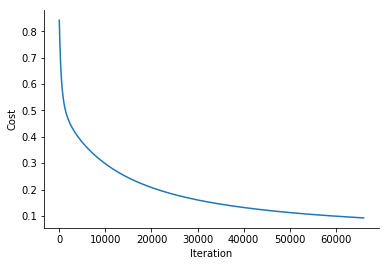

In [224]:
from collections import Counter

# add intercept value (1) to all our points
feature_with_intercept = np.hstack((np.ones((len(consolidated_feature), 1)), consolidated_feature))
predictions = predict(theta, feature_with_intercept)

# plot gradient descent iterations 
plt.plot(iters[:,0], iters[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
sb.despine()
plt.show()

Model accuracy = 0.9945


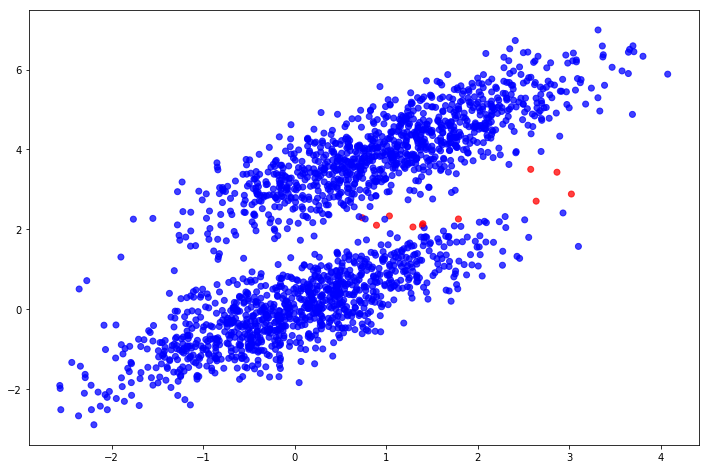

In [241]:
# visualise predictions
results = Counter(predictions == labels)
print "Model accuracy = %.4f" % (float(results[True])/sum(results.values()))

plt.figure(figsize=(12,8))
col = {1:'r',0:'b'}

plt.scatter(consolidated_feature[:,0], consolidated_feature[:,1], c=[col[x] for x in np.absolute(labels - predictions)], alpha=0.75)
plt.show()
